In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import time

In [3]:
filename_mahsa='//ZMN-HIVE/User-Data/Maria/check_registration/control/fish11_6dpf_medium_aligned.h5'
with h5py.File(filename_mahsa, "r") as f:
            # List all groups
    print("Keys: %s" % f.keys())
    start=time.time()
    reg_fish_mahsa=f['data'][:,10,:,:]
    end=time.time()
    print('Time to load file: ',end-start)

Keys: <KeysViewHDF5 ['data']>
Time to load file:  58.029747009277344


In [5]:
filename_norm='//ZMN-HIVE/User-Data/Maria/Caiman_MC/fish11_6dpf_medium_aligned.h5'
with h5py.File(filename_norm, "r") as f:
            # List all groups
    print("Keys: %s" % f.keys())
    start=time.time()
    reg_fish_norm=f['data'][:,10,:,:]
    end=time.time()
    print('Time to load file: ',end-start)

Keys: <KeysViewHDF5 ['data']>
Time to load file:  91.08173131942749


In [7]:
def compute_im_corr(mean_im,time_s):
    corr_lst=[]
    for time_p in range(time_s.shape[0]):
        corr_lst.append(np.corrcoef(time_s[time_p,:,:].flatten(),mean_im.flatten())[0,1])
    return corr_lst

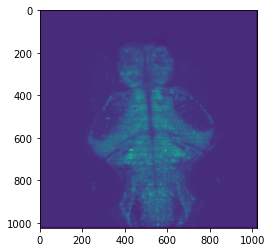

In [8]:
mean_mahsa=np.mean(reg_fish_mahsa,axis=0)
plt.imshow(mean_mahsa)

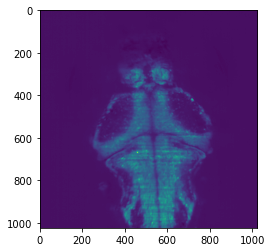

In [9]:
mean_norm=np.mean(reg_fish_norm,axis=0)
plt.imshow(mean_norm)

In [10]:
corr_lst_mahsa=compute_im_corr(mean_mahsa,reg_fish_mahsa)
corr_lst_norm=compute_im_corr(mean_norm,reg_fish_norm)

C:\Users\koester_lab\anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\koester_lab\anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


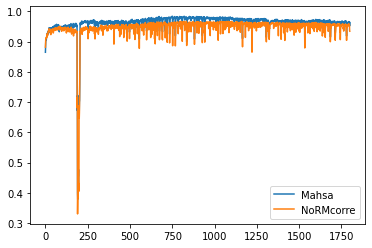

In [14]:
plt.plot(corr_lst_mahsa,label='Mahsa')
plt.plot(corr_lst_norm,label='NoRMcorre')
plt.legend()

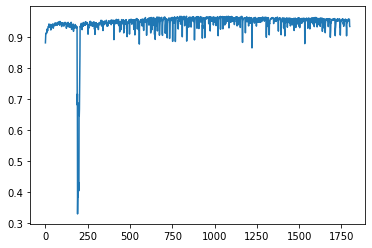

In [15]:
plt.plot(corr_lst_norm,label='NoRMcorre')

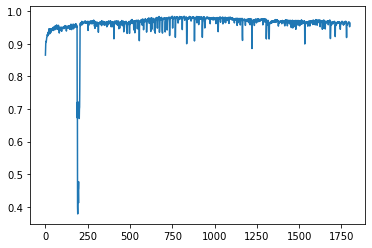

In [16]:
plt.plot(corr_lst_mahsa,label='Mahsa')

In [17]:
print(np.mean(corr_lst_mahsa[250:]))
print(np.mean(corr_lst_norm[250:]))

0.9684046179885327
0.9526771716182448
